In [1]:
# !pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

In [2]:
import torch
import torchvision
import numpy as np

In [3]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
train_dataset = torchvision.datasets.CIFAR10(root='./data',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=False)

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [6]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
from torch import nn 
from torch import optim
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 400)
        self.fc2 = nn.Linear(400, 200)
        self.fc3 = nn.Linear(200, 84)
        self.fc4 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net().to('cpu')

### Задание 1:
- Optimizer Adam
- увеличение размера linear слоев
- доп linear слой 

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [10]:
### под вторым заданием имелось ввиду сделать это?

for epoch in range(10):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 1000 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[2,     1] loss: 0.001
[3,     1] loss: 0.001
[4,     1] loss: 0.001
[5,     1] loss: 0.001
[6,     1] loss: 0.001
[7,     1] loss: 0.000
[8,     1] loss: 0.001
[9,     1] loss: 0.000
[10,     1] loss: 0.000
Training is finished!


In [11]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane


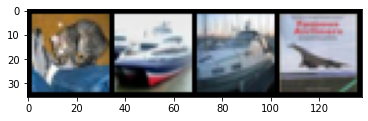

In [12]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### 4/4 =)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship plane


In [14]:
print('Actual: ', ' '.join('%5s' % classes[labels[j]]
                              for j in range(4)))

Actual:    cat  ship  ship plane


### Задание 3

In [16]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(28*28, 128)
        self.drop1 = nn.Dropout(0.2)
        self.lin2 = nn.Linear(128, 10)
    

    def forward(self, x):
        x = torch.flatten(x)
        x = self.lin1(F.relu(x)) 
        x = self.drop1(x)
        x = self.lin2(F.softmax(x))
        
        return x
    
net2 = Net2().to('cpu')

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net2.parameters(), lr=0.001)